# Titanic Survival Prediction: Model Selection and Hyperparameter Tuning

In this notebook, you will:
1. Load the Titanic dataset from an online source.
2. Perform basic EDA to understand the data.
3. Use pipelines to preprocess numerical and categorical data.
4. Train and evaluate multiple classification models (KNN, SVC, Random Forest, Decision Tree, Logistic Regression, Bagging, and Boosting).
5. Conduct hyperparameter tuning to find the best model.
6. Write reflection on the findings

---

## 1. Importing Libraries
**Task**: Import the necessary libraries for data handling, visualization, model training, and evaluation.

In [54]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import pipeline, train test and metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

#import models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


## 2. Load the titanic dataset from seaborn

In [55]:
titanic = sns.load_dataset('titanic')



## 3. Basic EDA (Exploratory Data Analysis)
Question 1: What is the shape of the dataset?

In [56]:
titanic.shape

(891, 15)

In [57]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Question 2: Are there any missing values?

In [58]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Question 3: Visualize some relationships (atleast 3). such as:

- The distribution of numerical features like age and fare.
- The survival rate by different classes, gender, etc.

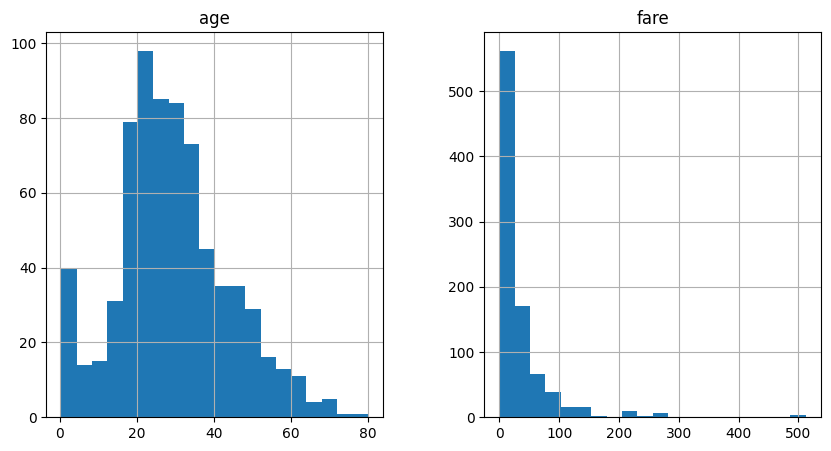

In [59]:
# plot histograms for age and fare
titanic[['age', 'fare']].hist(bins=20, figsize=(10, 5))
plt.show()

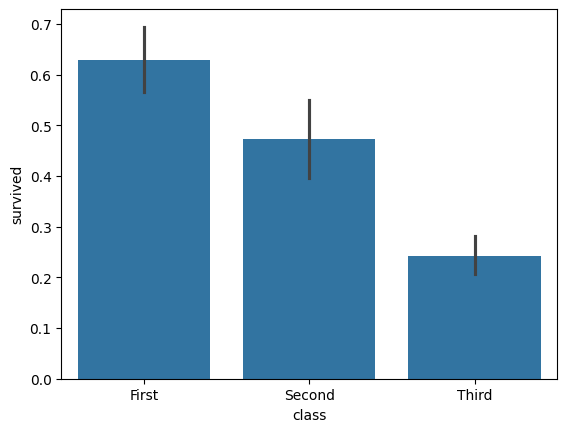

In [60]:
# plot survival rate from different classes using bar plot
sns.barplot(x='class', y='survived', data=titanic)
plt.show()

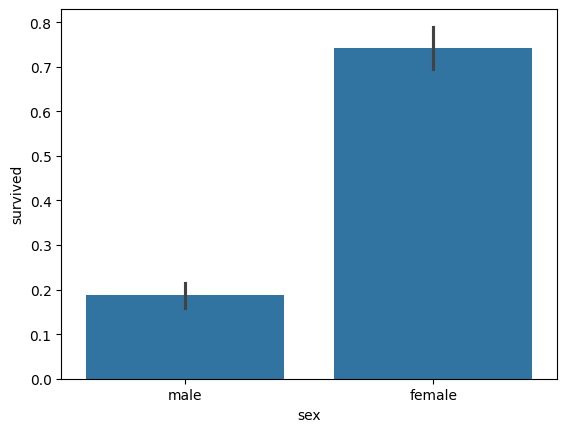

In [61]:
# plot survival rate by gender
sns.barplot(x='sex', y='survived', data=titanic)
plt.show()

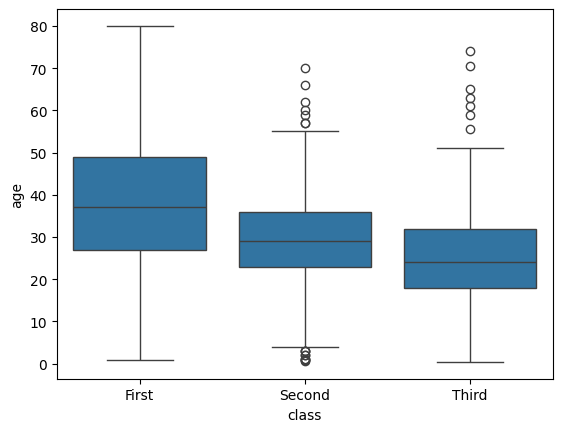

In [62]:
# box plot
sns.boxplot(x='class', y='age', data=titanic)
plt.show()

In [63]:
# Split the data into features and target
X = titanic[['age', 'fare', 'pclass', 'sex', 'embarked', 'who', 'alone']]
y = titanic['survived']




### Split the data into training and testing sets

In [64]:
# Split into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Data Preprocessing with Pipelines
Task: Create a data preprocessing pipeline for numerical and categorical features.

- Numerical features: Use StandardScaler to scale them.
- Categorical features: Use OneHotEncoder to encode them.
- impute missing values

In [65]:
# split into numerical and categorical
numerical_features = X.select_dtypes(include='number').columns
categorical_features = X.select_dtypes(include='object').columns


In [66]:
# Create pipeline to scale the numerical features and one hot encode the categorical and impute missing values
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor for data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Training data with multiple models

In [67]:
# Define models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Bagging Classifier': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}



# Evaluate each model
for model_name, model in models.items():
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print accuracy and classification report
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))




Model: K-Nearest Neighbors
Accuracy: 0.8156424581005587

Model: Logistic Regression
Accuracy: 0.7988826815642458

Model: Decision Tree
Accuracy: 0.770949720670391

Model: Random Forest
Accuracy: 0.7877094972067039

Model: Support Vector Machine
Accuracy: 0.8044692737430168

Model: Bagging Classifier
Accuracy: 0.8044692737430168

Model: Gradient Boosting
Accuracy: 0.8212290502793296


#Hyperparameter Tuning
## Define parameter grids for the top 2 models
Example:
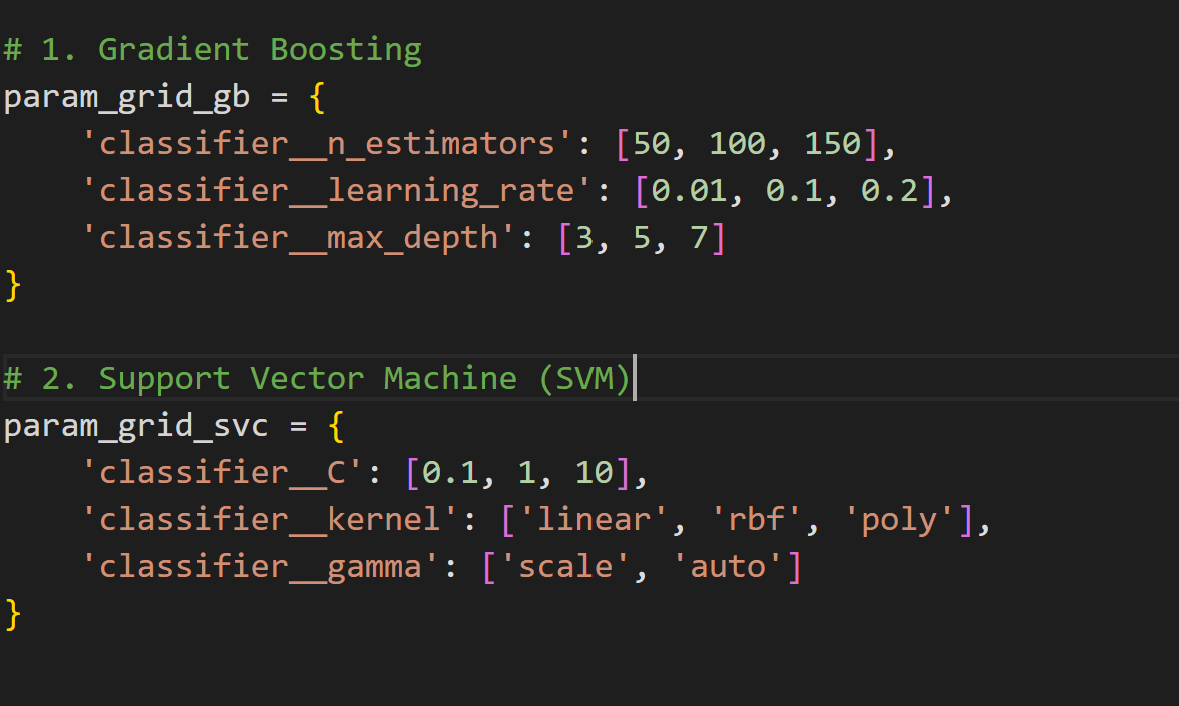

In [68]:
# 1. gradient boosting
param_grid_gb = {
    'classifier__n_estimators' : [50, 100, 150],
    'classifier__learning_rate' : [0.01, 0.1, 0.2],
    'classifier__max_depth' : [3, 5, 7]
}

# 2. SVM
param_grid_svc = {
    'classifier__C' : [0.1, 1, 10],
    'classifier__kernel' : ['linear', 'rbf', 'poly'],
    'classifier__gamma' : ['scale', 'auto']
}




## List of models and their corresponding parameter grids
Example
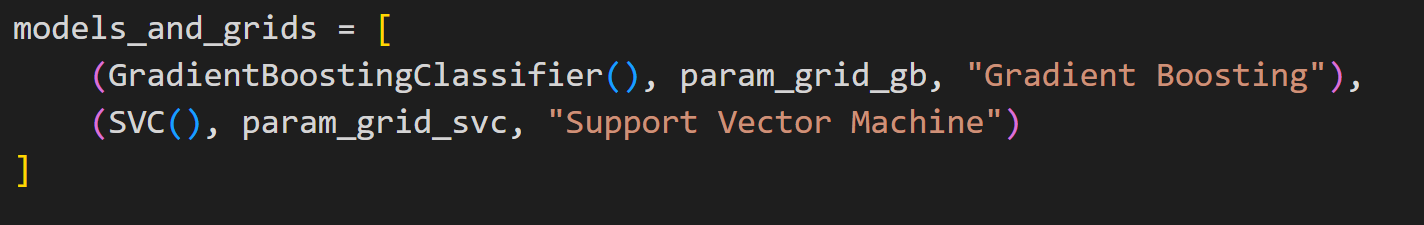

In [69]:
models_and_grids = [
    (GradientBoostingClassifier(), param_grid_gb, "Gradient Boosting"),
    (SVC(), param_grid_svc, "Support Vector Machine")
]

In [70]:
# Loop through each model and perform GridSearchCV
for model, param_grid, model_name in models_and_grids:
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Output the best parameters and best cross-validation score for each model
    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")
    print(f"Test accuracy for {model_name}: {grid_search.score(X_test, y_test):.4f}")


Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 50}
Best cross-validation accuracy for Gradient Boosting: 0.8273
Test accuracy for Gradient Boosting: 0.8324

Best parameters for Support Vector Machine: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best cross-validation accuracy for Support Vector Machine: 0.8301
Test accuracy for Support Vector Machine: 0.8045


## 7.Reflection and Analysis
Which model performed the best without tuning?

1. Based on the initial accuracy scores, which model had the highest accuracy before hyperparameter tuning?
- For the most part, each model had around the same accuracy score which hovered around 0.8. The best out of these models was the gradient boosting at 0.82 before hyperparameter tuning.  

2. What are two best top performing model? How did hyperparameter tuning affect the top-performing models?
- The top two best performing were the tuned gradient boosting and the tuned SVM models. Hyperparameter tuning increased the accuracy by 0.01 for gradient boosting and nearly 0.03 for SVM which are both good increases.

3. Compare the accuracy scores before and after tuning for each of the top-performing models. Which model showed the most improvement?
- SVM showed the most improvement after tuning going from ~0.80 to 0.83.

4. Summarize the optimal parameters found during hyperparameter tuning. How do these optimal parameters differ from the default ones?
- The optimal parameters differ slightly from the defaults for gradient boosting with the learning rate staying the same, the max depth increasing from 3 to 5, and the n estimators decreasing from 100 to 50.
- The optimal parameters did not change for SVM, but the best score was still higher than the original.

5. Did any model experience overfitting after tuning?
Examine the training versus test accuracy for each of the top models after tuning.
Based on your findings, which model would you select for deployment, and why?
- The models might be slighly overfitted as for both of them, their best score is about 3% higher than the test score.
- Still, I would select the tuned gradient boosting model as it had the highest accuracy score and may only be slightly overfitted>
6. Considering both performance (accuracy) and other factors like model complexity and interpretability, which model would you choose as the best candidate for deployment? Explain your reasoning.
- I think the tuned gradient boosting model would be the best candidate for deployment as it not only had the highest accuracy, but it also not prone to overfitting so it is likely the most accurate prediction model for this set.